In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from PIL import Image # resimleri yüklemek için kullanıcağım
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
import tensorflow as tf

from thispersondoesnotexist import get_online_person
import uuid

C:\Users\mete\anaconda3\envs\tf\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/mete/Desktop/age model/my_model.h5')
gender_model = keras.models.load_model('C:/Users/mete/Desktop/age model/gender_model.h5')

In [4]:
turkeyOfCitys = ["Adana","Adiyaman","Afyon","Agri","Aksaray","Amasya","Ankara","Antalya","Ardahan","Artvin","Aydin","Balikesir","Bartin","Batman","Bayburt","Bilecik","Bingol","Bitlis","Bolu","Burdur","Bursa","Canakkale","Cankiri","Corum","Denizli","Diyarbakir","Duzce","Edirne","Elazig","Erzincan","Erzurum","Eskisehir","Gaziantep","Giresun","Gumushane","Hakkari","Hatay","Igdir","Isparta","Istanbul","Izmir","Kahramanmaras","Karabuk","Karaman","Kars","Kastamonu","Kayseri","Kilis","Kirikkale","Kirklareli","Kirsehir","Kocaeli","Konya","Kutahya","Malatya","Manisa","Mardin","Mersin","Mugla","Mus","Nevsehir","Nigde","Ordu","Osmaniye","Rize","Sakarya","Samsun","Sanliurfa","Siirt","Sinop","Sirnak","Sivas","Tekirdag","Tokat","Trabzon","Tunceli","Usak","Van","Yalova","Yozgat","Zonguldak"]

goalAndNeedsArray = ["Uygulamanın daha basit ve anlaşılır olmasını istiyor.","Uygulamanın çok yavaş çalıştığını düşünüyor.","Uygulamadaki karanlık modun olmasını istiyor.","Türkçe dil desteği istiyor","İstediği şeyi kolayca bulabilmek için arama çubuğu istiyor.","kenara biraz para koymak için harcamalarının kaydını tutmak istiyor.","Aylık bütçesi genellikle oldukça sınırlı olduğundan, harcamaları takip etmesi ve öğrenim ücretlerini karşılayacak kadar tasarruf etmesi gerekiyor. Masraflar için, adam hareket halindeyken (okul ücreti dahil) herhangi bir şey için ödeme yapmayı tercih ediyor."]

painPointsArray = ["Website'ye çoğunlukla telefondan girdiğinden telefon için bir uygulama istiyor","Sitenin sürekli çöktüğünü ve işinin yarım kaldığnı söylüyor.","kullandığı mobil bankacılık uygulaması yavaş ve zamanı takdir ettiği için bundan memnun değil."]

revelantPartternsArray = ["teknoloji konusunda bilgili değil, bu nedenle akıllı telefonunu (iPhone 5) internette gezinmek için nadiren kullanıyor","çoğunlukla üniversiteyle ilgili görevleri yapmak ve blogunu sürdürmek için dizüstü bilgisayarında günde iki ila üç saat internette geziniyor.","çevrimiçi güvenliğinin varlığına çok önem verir. Bu nedenle verilerini güvende tutuyor ve uçtan uca şifrelemeye sahip en güvenli mobil bankacılık uygulamasını arıyor."]

In [5]:
def gender_prediction(filename):
    
    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    
    # prediction
    result = gender_model.predict(im)
    prediction = np.argmax(result)
    
    return result

In [6]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
        ar = np.asarray(im)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            ar = np.asarray(im)
            
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = model.predict(ar)
    
    
    genderNumber = gender_prediction(file) # sürekli aynı resmi 
    gender = "nan"

    if genderNumber[0][0] < 0.5:
        gender = "erkek"
    else:
        gender = "bayan"
        
    print('Age:', int(age))
    print('Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS),int(age),gender

Age: 42
Gender: bayan


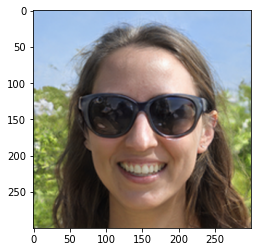

(<PIL.Image.Image image mode=RGB size=300x300 at 0x23C9809A460>,
 42,
 'bayan',
 UUID('3afb32fb-a557-4ddd-ab43-3079986a0083'))

In [7]:
async def my_fonction():
    picture = await get_online_person()
    random_uuid = uuid.uuid4()
    # Save to a file
    from thispersondoesnotexist import save_picture
    await save_picture(picture, f"C:/Users/mete/PycharmProjects/flaskProject/static/{random_uuid}.jpeg")
    # If no filename is provided, one will be generated using the checksum of the picture
    await save_picture(picture)


    image,age,gender = process_and_predict(f"C:/Users/mete/PycharmProjects/flaskProject/static/{random_uuid}.jpeg")
    plt.imshow(image)
    plt.show()
    return image,age,gender,random_uuid

await my_fonction()

Age: 9
Gender: erkek


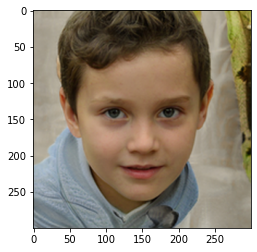

Age: 17
Gender: bayan


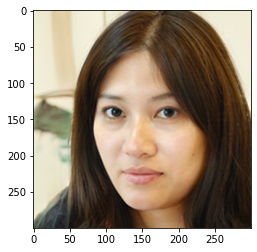

Age: 25
Gender: bayan


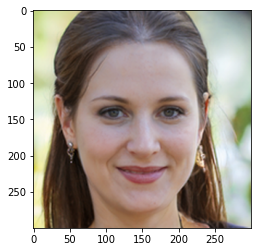

Age: 33
Gender: bayan


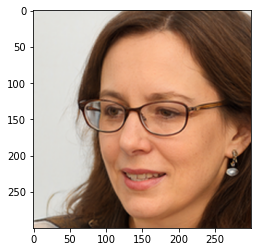

Age: 7
Gender: bayan


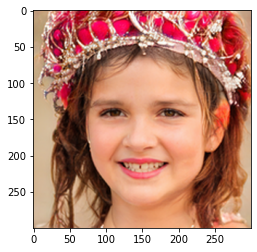

Age: 18
Gender: bayan


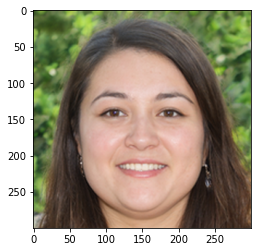

Age: 33
Gender: bayan


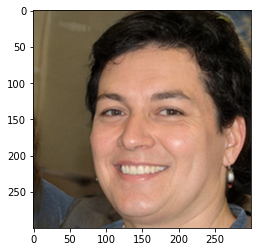

Age: 22
Gender: bayan


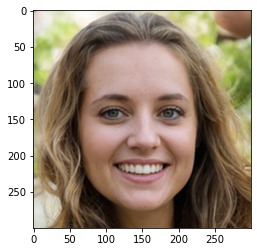

Age: 29
Gender: erkek


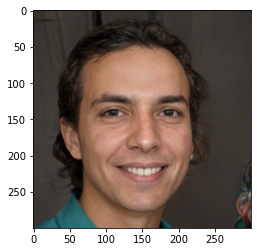

Age: 35
Gender: erkek


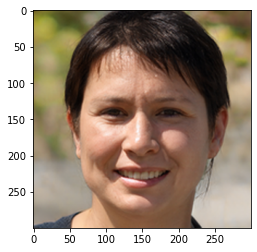

In [11]:
from faker import Faker
fake = Faker('tr_TR')


data = pd.DataFrame( columns = ['Name','Age','Gender','image_path',"job","city","Goals And Needs","Relevant Patterns","Pain Points"])

for x in range(10):
    image,age,gender,random_uuid = await my_fonction()
    
    if gender == "erkek":
        first_name = fake.first_name_male()
    else:
        first_name = fake.first_name_female()
        
    last_name = fake.last_name()
    
    name = first_name + " " + last_name
    
    image_path = f"{random_uuid}.jpeg"
    
    if(age > 18):
        job = fake.job()
    else:
        job = "Öğrenci"
    
    city = random.choice(turkeyOfCitys)

    goalsAndNeeds = random.choice(goalAndNeedsArray)
    relevantPatterns = "şu anlık dursun"
    painPoints = random.choice(painPointsArray)


    my_array = np.array([name,age,gender,image_path,job,city,goalsAndNeeds,relevantPatterns,painPoints])

    data = data.append(dict(zip(data.columns, my_array)), ignore_index=True)
    time.sleep(5)

In [12]:
#data.append(my_array, ignore_index=True)
data

,Name,Age,Gender,image_path,job,city,Goals And Needs,Relevant Patterns,Pain Points
0,Sezginbaş Duran,9,erkek,0574da5c-8058-4dc2-a011-961b962af799.jpeg,Öğrenci,Kilis,Uygulamanın çok yavaş çalıştığını düşünüyor.,şu anlık dursun,Sitenin sürekli çöktüğünü ve işinin yarım kald...
1,Maynur Zengin,17,bayan,0b5986a6-86f2-45c4-84e8-e12d568a08d6.jpeg,Öğrenci,Osmaniye,İstediği şeyi kolayca bulabilmek için arama çu...,şu anlık dursun,kullandığı mobil bankacılık uygulaması yavaş v...
2,Ummahani Soylu,25,bayan,d16f2620-af2a-4604-abca-7aca5b454f06.jpeg,Mühendis,Kastamonu,Aylık bütçesi genellikle oldukça sınırlı olduğ...,şu anlık dursun,kullandığı mobil bankacılık uygulaması yavaş v...
3,Elifnur Yılmaz,33,bayan,ae2103d4-814b-4ebc-bc9e-600d5140a2fa.jpeg,Böcekbilimci,Duzce,Türkçe dil desteği istiyor,şu anlık dursun,Sitenin sürekli çöktüğünü ve işinin yarım kald...
4,Ufukay Türk,7,bayan,161eec78-5524-448e-800e-678fccf9c835.jpeg,Öğrenci,Kirklareli,İstediği şeyi kolayca bulabilmek için arama çu...,şu anlık dursun,kullandığı mobil bankacılık uygulaması yavaş v...
5,Tanses Akçay,18,bayan,89e36153-7d57-464b-9d43-6ad8263005e6.jpeg,Öğrenci,Denizli,Uygulamanın daha basit ve anlaşılır olmasını i...,şu anlık dursun,Sitenin sürekli çöktüğünü ve işinin yarım kald...
6,Gülfeza Gülen,33,bayan,ce911212-0a5d-4bf2-90b8-d76b7991ad5f.jpeg,Simyacı,Giresun,İstediği şeyi kolayca bulabilmek için arama çu...,şu anlık dursun,Sitenin sürekli çöktüğünü ve işinin yarım kald...
7,Aynımah Akçay,22,bayan,e187597f-c4d6-48f9-b938-84574ca7c860.jpeg,Komiser,Kirsehir,Uygulamanın daha basit ve anlaşılır olmasını i...,şu anlık dursun,Website'ye çoğunlukla telefondan girdiğinden t...
8,Eyyüp Erdoğan,29,erkek,18e1a332-b521-4f8a-9ec0-d1277d3aa75f.jpeg,Haberci,Erzincan,İstediği şeyi kolayca bulabilmek için arama çu...,şu anlık dursun,kullandığı mobil bankacılık uygulaması yavaş v...
9,Özel Ertaş,35,erkek,b2ecbd8d-b7a2-472d-ba79-d3b2ae283f3c.jpeg,Köşe yazarı,Mugla,İstediği şeyi kolayca bulabilmek için arama çu...,şu anlık dursun,Website'ye çoğunlukla telefondan girdiğinden t...


In [13]:
import sqlite3

con = sqlite3.connect("C:/Users/mete/Desktop/proje3 veritabanı/dataFrame.db")

data.to_sql("People", con, if_exists="append",index=False)

con.close()